In [1]:
from FRC_API import FRC_API_Interface
from pprint import pp
import time
import matplotlib.pyplot as plt # type: ignore
import numpy as np

In [31]:
frc_api = FRC_API_Interface()

season = 2024

events = frc_api.request(f'{season}/events?tournamentType=DistrictEvent')['Events']
pp(events[0])

{'allianceCount': 'EightAlliance',
 'weekNumber': 1,
 'announcements': [],
 'code': 'CTHAR',
 'divisionCode': None,
 'name': 'NE District Hartford Event',
 'type': 'DistrictEvent',
 'districtCode': 'NE',
 'venue': 'Hartford Public High School',
 'city': 'Hartford',
 'stateprov': 'CT',
 'country': 'USA',
 'dateStart': '2024-03-01T00:00:00',
 'dateEnd': '2024-03-03T23:59:59',
 'address': '55 Forest St',
 'website': 'http://www.nefirst.org/',
 'webcasts': [],
 'timezone': 'Eastern Standard Time'}


In [35]:
event_codes = [event['code'] for event in events]
event_codes_subset = event_codes

print(len(event_codes_subset))

98


In [36]:

print(time.asctime())

EventRankAlliancesType = list[tuple[int, int, int]]
rank_alliances: dict[str, EventRankAlliancesType] = {}

for i, eventCode in enumerate(event_codes_subset):
    print(f'\r{eventCode} ({i+1}/{len(event_codes_subset)})' + ' '*20, end='')

    rankings = frc_api.request(f'{season}/rankings/{eventCode}')['Rankings']
    # pp(rankings[0:2])

    rank_map: dict[int, int] = {int(team['teamNumber']): int(team['rank']) for team in rankings}

    alliances = frc_api.request(f'{season}/alliances/{eventCode}')['Alliances']
    # pp(alliances[0:2])

    event_rank_alliances: EventRankAlliancesType = [(
        rank_map[int(alliance['captain'])], rank_map[int(alliance['round1'])], rank_map[int(alliance['round2'])]
        ) for alliance in alliances]
    
    rank_alliances[eventCode] = event_rank_alliances

    time.sleep(2)
    


Mon Oct 14 17:21:41 2024
VAPOR (93/98)                    

KeyError: 9990

In [37]:
pp(rank_alliances)

{'CTHAR': [(1, 2, 20),
           (3, 13, 21),
           (4, 6, 17),
           (5, 10, 32),
           (7, 9, 23),
           (8, 11, 16),
           (12, 19, 24),
           (14, 15, 22)],
 'CTWAT': [(1, 13, 20),
           (2, 6, 18),
           (3, 9, 24),
           (4, 19, 23),
           (5, 11, 14),
           (7, 28, 16),
           (8, 12, 17),
           (10, 15, 22)],
 'GAALB': [(1, 2, 26),
           (3, 4, 20),
           (5, 7, 25),
           (6, 10, 28),
           (8, 9, 23),
           (11, 16, 17),
           (12, 13, 22),
           (14, 18, 21)],
 'GACAR': [(1, 2, 29),
           (3, 6, 28),
           (4, 5, 26),
           (7, 8, 27),
           (9, 10, 24),
           (11, 12, 19),
           (13, 15, 16),
           (14, 18, 17)],
 'GADAL': [(1, 4, 33),
           (2, 3, 22),
           (5, 21, 27),
           (6, 9, 23),
           (7, 10, 18),
           (8, 34, 29),
           (11, 15, 24),
           (12, 19, 13)],
 'GAGWI': [(1, 2, 21),
           (3, 6,

I need to make a plot of picks. I'd like the ability to separate by which pick it is (i.e. nth pick of nth alliance). Therefore I need the data to be categorized by pick number, and adjusted rank. Pick can be 1-16 and adjusted rank can be 1+.

To do this for all events, I should have a list of events.
Each event should have a list of picks.
Each list of picks should be the adjusted ranks

In [38]:
pick_adjusted_ranks: list[list[int]] = []

for eventCode, event_rank_alliances in rank_alliances.items():
    available_teams = list(range(1, 100))

    picks: list[int] = []

    for alliance in event_rank_alliances:
        available_teams.remove(alliance[0])

        pick = available_teams.index(alliance[1])
        picks.append(pick)
        available_teams.remove(alliance[1])

    event_rank_alliances.reverse()

    for alliance in event_rank_alliances:
        pick = available_teams.index(alliance[2])
        picks.append(pick)
        available_teams.remove(alliance[2])

    pick_adjusted_ranks.append(picks)

In [39]:
pp(pick_adjusted_ranks)

[[0, 9, 1, 3, 1, 0, 5, 0, 5, 6, 0, 4, 11, 0, 2, 1],
 [11, 3, 4, 11, 3, 16, 1, 1, 6, 2, 1, 0, 3, 3, 0, 0],
 [0, 0, 1, 2, 0, 4, 0, 2, 4, 4, 1, 3, 7, 4, 2, 3],
 [0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 4, 6, 5, 5, 5],
 [2, 0, 15, 2, 1, 22, 3, 5, 0, 7, 11, 3, 5, 7, 4, 10],
 [0, 2, 5, 3, 1, 1, 13, 2, 0, 0, 9, 5, 8, 0, 3, 2],
 [12, 1, 3, 2, 2, 6, 1, 2, 1, 4, 1, 4, 5, 0, 3, 0],
 [7, 0, 0, 7, 0, 5, 2, 1, 3, 0, 1, 0, 1, 4, 0, 2],
 [0, 4, 3, 3, 20, 7, 0, 0, 1, 0, 7, 4, 0, 0, 2, 8],
 [0, 10, 2, 5, 4, 1, 17, 0, 0, 0, 0, 2, 5, 1, 1, 8],
 [1, 4, 0, 4, 3, 0, 14, 6, 0, 4, 2, 3, 4, 8, 6, 6],
 [4, 1, 0, 7, 3, 2, 8, 3, 0, 0, 2, 1, 1, 2, 5, 0],
 [0, 6, 4, 5, 0, 0, 4, 1, 6, 7, 0, 0, 7, 0, 1, 0],
 [3, 2, 9, 6, 4, 7, 5, 1, 9, 0, 8, 2, 7, 0, 4, 2],
 [1, 2, 0, 0, 14, 1, 0, 5, 3, 2, 2, 1, 11, 1, 4, 1],
 [0, 2, 8, 6, 7, 6, 3, 0, 7, 4, 2, 1, 5, 1, 1, 9],
 [4, 0, 11, 3, 0, 2, 12, 0, 3, 0, 8, 1, 1, 0, 10, 8],
 [0, 3, 9, 8, 6, 6, 4, 1, 1, 5, 11, 2, 2, 0, 11, 1],
 [6, 2, 3, 1, 8, 3, 3, 9, 9, 4, 1, 8, 4, 3, 4, 4],
 [0, 0, 5,

In [45]:
all_pick_adjusted_ranks: list[int] = []

for item in pick_adjusted_ranks:
    all_pick_adjusted_ranks = all_pick_adjusted_ranks + item

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


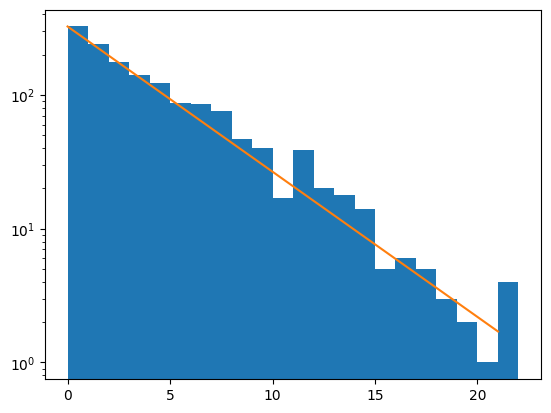

In [60]:
lowest_pick = max(all_pick_adjusted_ranks)
x = np.arange(lowest_pick)
print(x)
y = 325 * np.exp(-x/4)

plt.hist(all_pick_adjusted_ranks, bins=lowest_pick) # type: ignore
plt.plot(x, y) # type: ignore
plt.gca().set_yscale('log') # type: ignore
plt.show() # type: ignore

Categorized by:
Season
Tournament Type (i.e. district event, regional, district championship, champs, offseason, etc.)
Pick number (both alliance and round)